In [22]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 500
bounds = 20
order = 6
robust = True

Preparing for an Unmeasured Reconstruction ...
	Done. Took 0.000 Seconds
Building LQ ...
	Done. Took 0.890 Seconds
Building M ...
	Done. Took 0.694 Seconds
Building yhat ...
	Done. Took 0.000 Seconds
Running Least Squares to get xhat ...
	Finished in 500 iterations
	Done. Took 23.725 Seconds
Extracting Qis ...
	Done. Took 0.006 Seconds
Learning Convolution for Q(1,2) ...
	Q(1,2) Stock 1 <-- Stock 2: 1.135*(-0.059)^t + 16.242*(0.017)^t + -0.623*(0.110)^t + 0.562*(-0.016)^t + -0.176*(0.019)^t + -3.547*(0.016)^t + -13.593832 * delta(t,0)
		RMSE = 0.004
		Matlab: [  1.13  -0.06  16.24   0.02  -0.62   0.11   0.56  -0.02  -0.18   0.02  -3.55   0.02]
	Done. Took 433.906 Seconds
Learning Convolution for Q(1,3) ...
	Q(1,3) Stock 1 <-- Stock 3: 1.935*(-0.028)^t + 11.871*(0.075)^t + -9.522*(0.079)^t + 7.674*(-0.030)^t + -7.220*(-0.134)^t + 4.921*(-0.152)^t + -9.658283 * delta(t,0)
		RMSE = 0.002
		Matlab: [  1.93  -0.03  11.87   0.08  -9.52   0.08   7.67  -0.03  -7.22  -0.13   4.92  -0.15]
	Done.

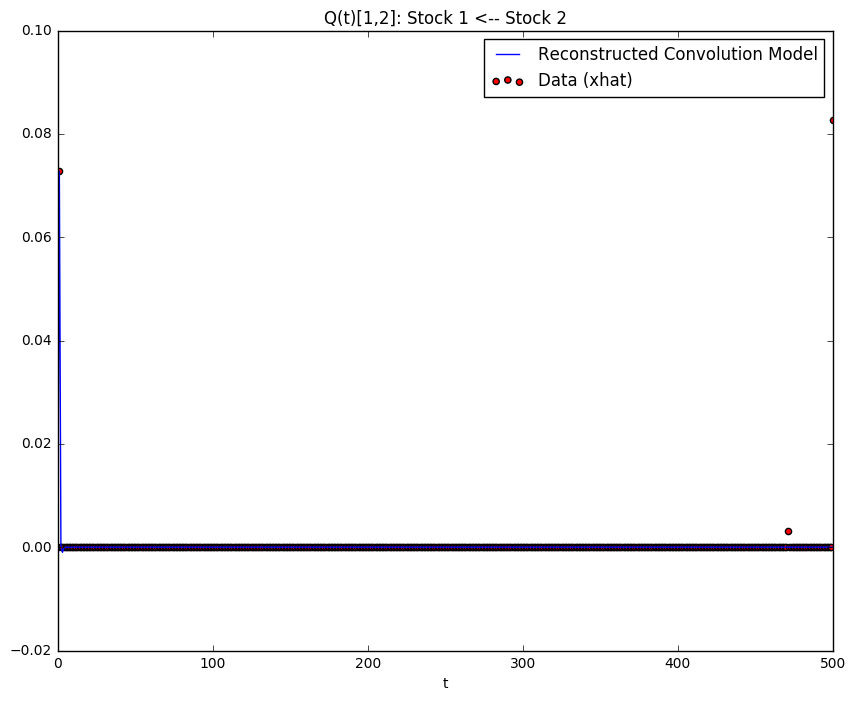

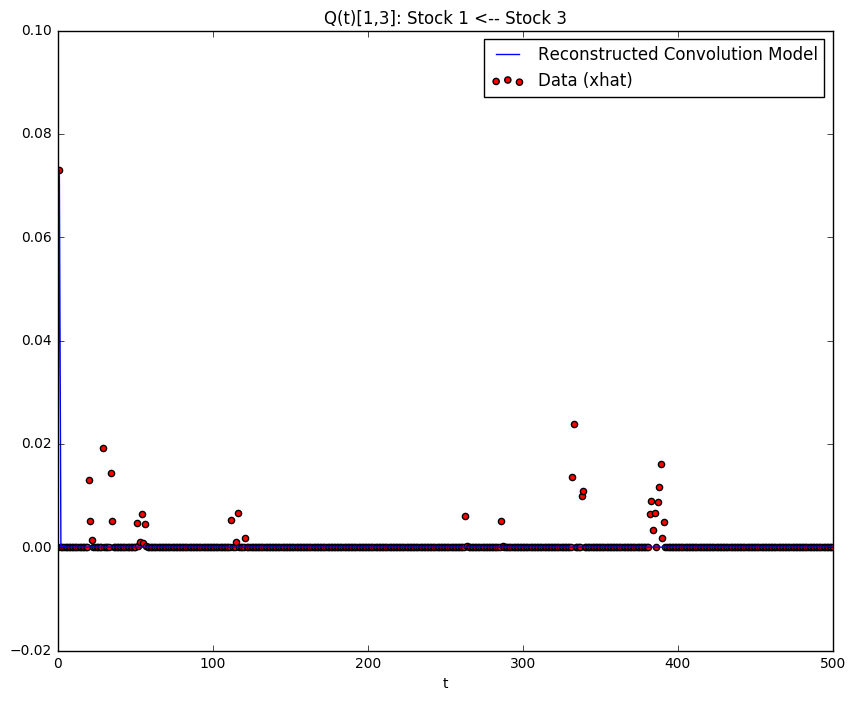

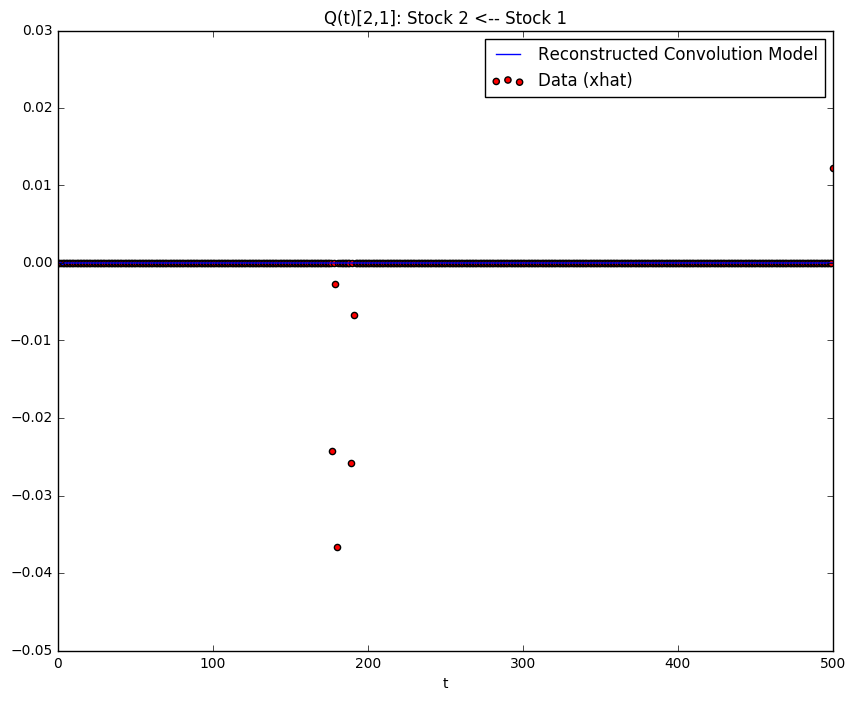

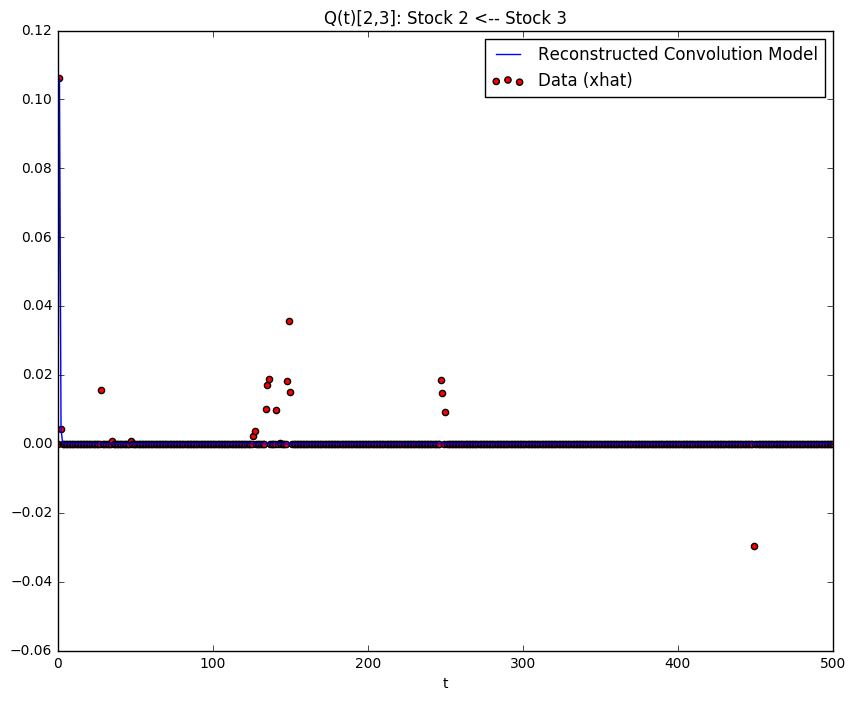

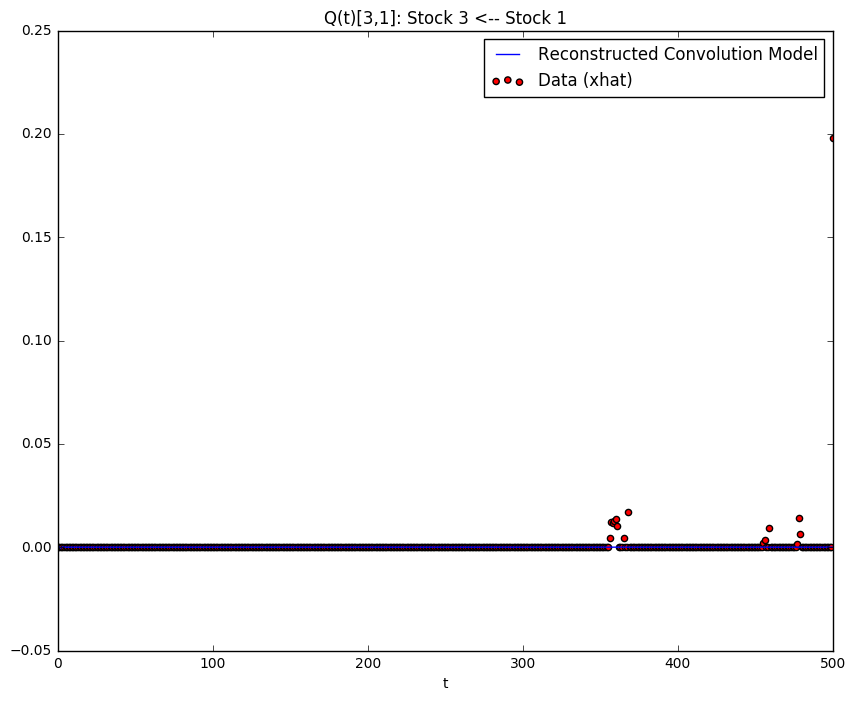

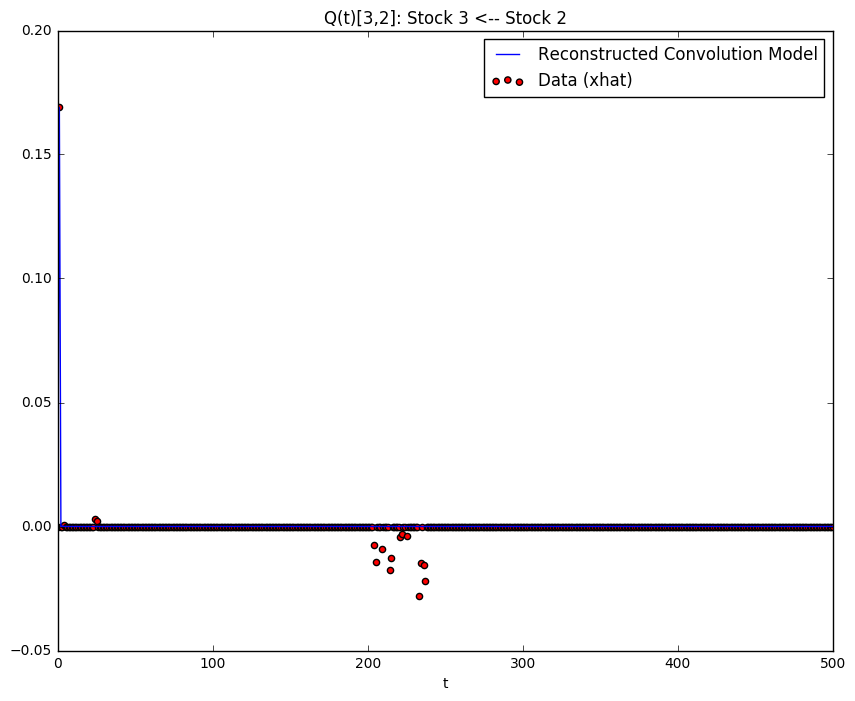

In [23]:
%matplotlib inline
df = pd.read_csv('SimStockData1.csv', index_col=0)
cols = df.columns

y = df[cols]
titles = {i + 1: stock for i, stock in enumerate(cols)}

recon = Reconstructor(debug=True, r=R, max_iterations=1000, bounds=bounds, order=order, robust=robust)
rs = recon.unmeasured(y.values, plot=True, titles=titles)

In [24]:
flat = []
for key, vals in rs.items():
    for k2, lst in vals.items():
        flat.append(list(lst))
        
subs = [' '.join([str(item) for item in sub]) for sub in flat]
arr = ' ; '.join(subs)
colstrs = ['\'{}\''.format(item) for item in cols]
print('magnitudes([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

magnitudes([1.134999233 -0.0592314982439 16.2424759605 0.0171961155135 -0.62306641084 0.110062494111 0.562221883344 -0.0159996881642 -0.175947036925 0.0192182416731 -3.54685147638 0.0164556321447 ; 1.93463416979 -0.0279817276296 11.8710945599 0.0751292736158 -9.52225187008 0.0792647022013 7.67418622652 -0.0296479762283 -7.22046222001 -0.133605384298 4.92108206868 -0.151830900383 ; -0.170991954099 0.108898844968 0.90540622462 0.0656839502623 1.50810420728 0.00340390728864 -3.50623998229 0.052122593909 3.63658217656 0.0437443046007 0.710469229348 -0.0314026074896 ; -1.95022556104 0.00312206484204 -8.42421421887 0.00879052837762 0.593256914661 0.0770105090003 -1.74901469094 -0.00948832432681 -4.42604216227 -0.00144171332165 8.33497510608 0.0141112498457 ; -3.45924833457 -0.0232097521674 -17.5582230214 0.00524008107692 -8.43642079488 -0.00534848296898 0.7292445275 0.0484678363249 8.39728959606 -0.00768807720435 -0.418797900187 0.0100021104778 ; 1.63100257498 0.0417034903946 -5.46402258111 

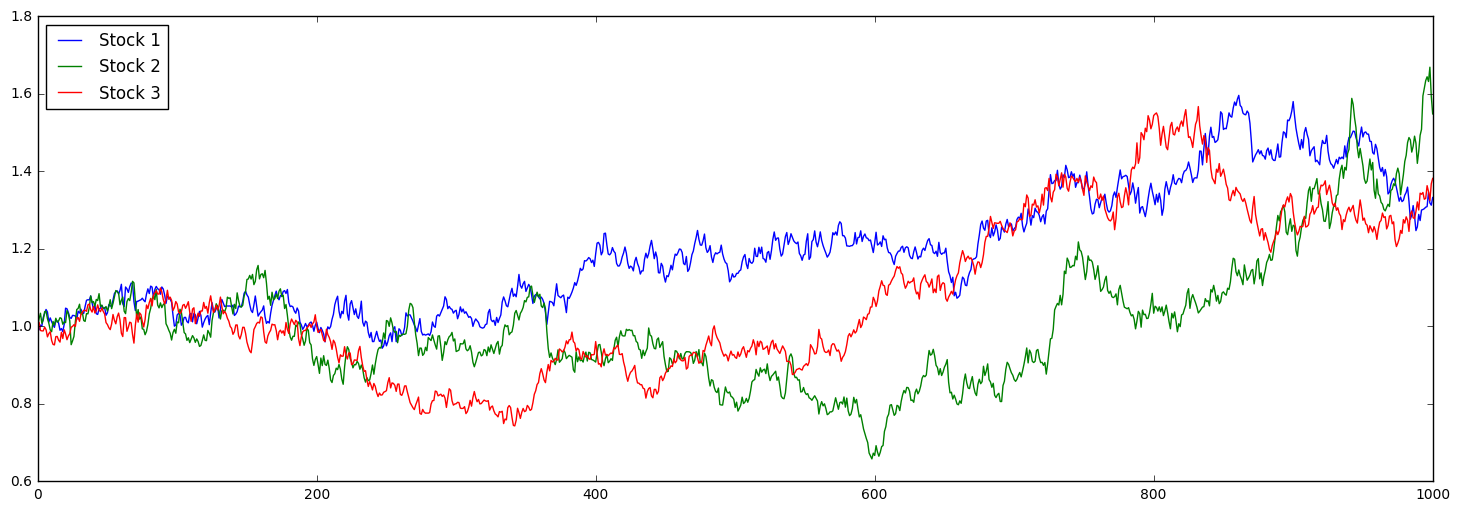

In [32]:
%matplotlib inline
df.plot(figsize=(18,6))